In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics supervision

In [3]:
!nvidia-smi

Mon Oct 20 02:44:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:


# Copy the dataset ZIP to the current working directory
!scp -r "/content/drive/MyDrive/Purwadhika/Capstone Answer/MODULE 4/vehicle-detection/vehicle-detection.v1i.yolov12.zip" . # REPLACE THE SOURCE PATH WITH YOURS -> /content/drive/MyDrive/datasets/rock-paper-scissors-14.zip

In [6]:
!unzip /content/vehicle-detection.v1i.yolov12.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/Screenshot-2025-04-07-215641_png.rf.c9b7b69b93464c03982a60f9ed2553af.txt  
  inflating: train/labels/Screenshot-2025-04-07-215641_png.rf.f688b06d249bbfc3ecd0363a0b6cf7e1.txt  
  inflating: train/labels/Screenshot-2025-04-07-215645_png.rf.15441eb22f4ca0b0162730171dac65a8.txt  
  inflating: train/labels/Screenshot-2025-04-07-215645_png.rf.41ea7ce664e052543505dc89c696e939.txt  
  inflating: train/labels/Screenshot-2025-04-07-215645_png.rf.cafdb8b739000d563e63a3f879b77afd.txt  
  inflating: train/labels/Screenshot-2025-04-07-215649_png.rf.81f7918ce7f35393d074d28432d213fc.txt  
  inflating: train/labels/Screenshot-2025-04-07-215649_png.rf.892742101908a1d569db1f50605192b0.txt  
  inflating: train/labels/Screenshot-2025-04-07-215649_png.rf.917687f765b532174bdd19a7f68e46d9.txt  
  inflating: train/labels/Screenshot-2025-04-07-215704_png.rf.6b7dba37287abf9e21c6b40047a4bdc1.txt  
  inflating: train/labels/Screenshot-202

In [7]:
dataset_location = "/content/"

In [8]:
!ls {dataset_location}

data.yaml	     runs	  valid
drive		     sample_data  vehicle-detection.v1i.yolov12.zip
README.dataset.txt   test	  yolo11n.pt
README.roboflow.txt  train	  yolov12n.pt


In [9]:
!cat {dataset_location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['bus', 'car', 'van']

roboflow:
  workspace: personal-project-kej16
  project: vehicle-detection-vznzd-dkl8g
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/personal-project-kej16/vehicle-detection-vznzd-dkl8g/dataset/1

In [10]:
!wget https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt

--2025-10-20 02:45:42--  https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/928546208/99db71db-0946-4c10-94a0-b54baf471037?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-20T03%3A34%3A53Z&rscd=attachment%3B+filename%3Dyolov12n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-20T02%3A34%3A10Z&ske=2025-10-20T03%3A34%3A53Z&sks=b&skv=2018-11-09&sig=dsIIPnCR3aPW98U4UjcCyrjyhoMBoe0Ig4nrE%2BW8ZmQ%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MDkyODY0MiwibmJmIjoxNzYwOTI4MzQyLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9i

In [11]:
from ultralytics import YOLO

model = YOLO('yolov12n.pt')

In [12]:
results = model.train(
        data=f'{dataset_location}/data.yaml', # Using 20 epochs for faster training
        epochs=50,
        batch=32y,
        imgsz=640,
        exist_ok=True,
        patience=5,              # Early stopping if no improvement for 5 epochs
        save_period=5,           # Save checkpoints every 5 epochs
        val=True,                # Ensure validation is performed
        verbose=True,            # Show detailed output during training
        flipud=0.5,              # Augmentation using vertical flip probability
)

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content//data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretra

In [13]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Lists training artifacts such as weights, result plots, and confusion matrix.
!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	       val_batch0_labels.jpg
BoxF1_curve.png			 results.png	       val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxPR_curve.png			 train_batch11560.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch11561.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch11562.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg      weights
labels.jpg			 train_batch2.jpg


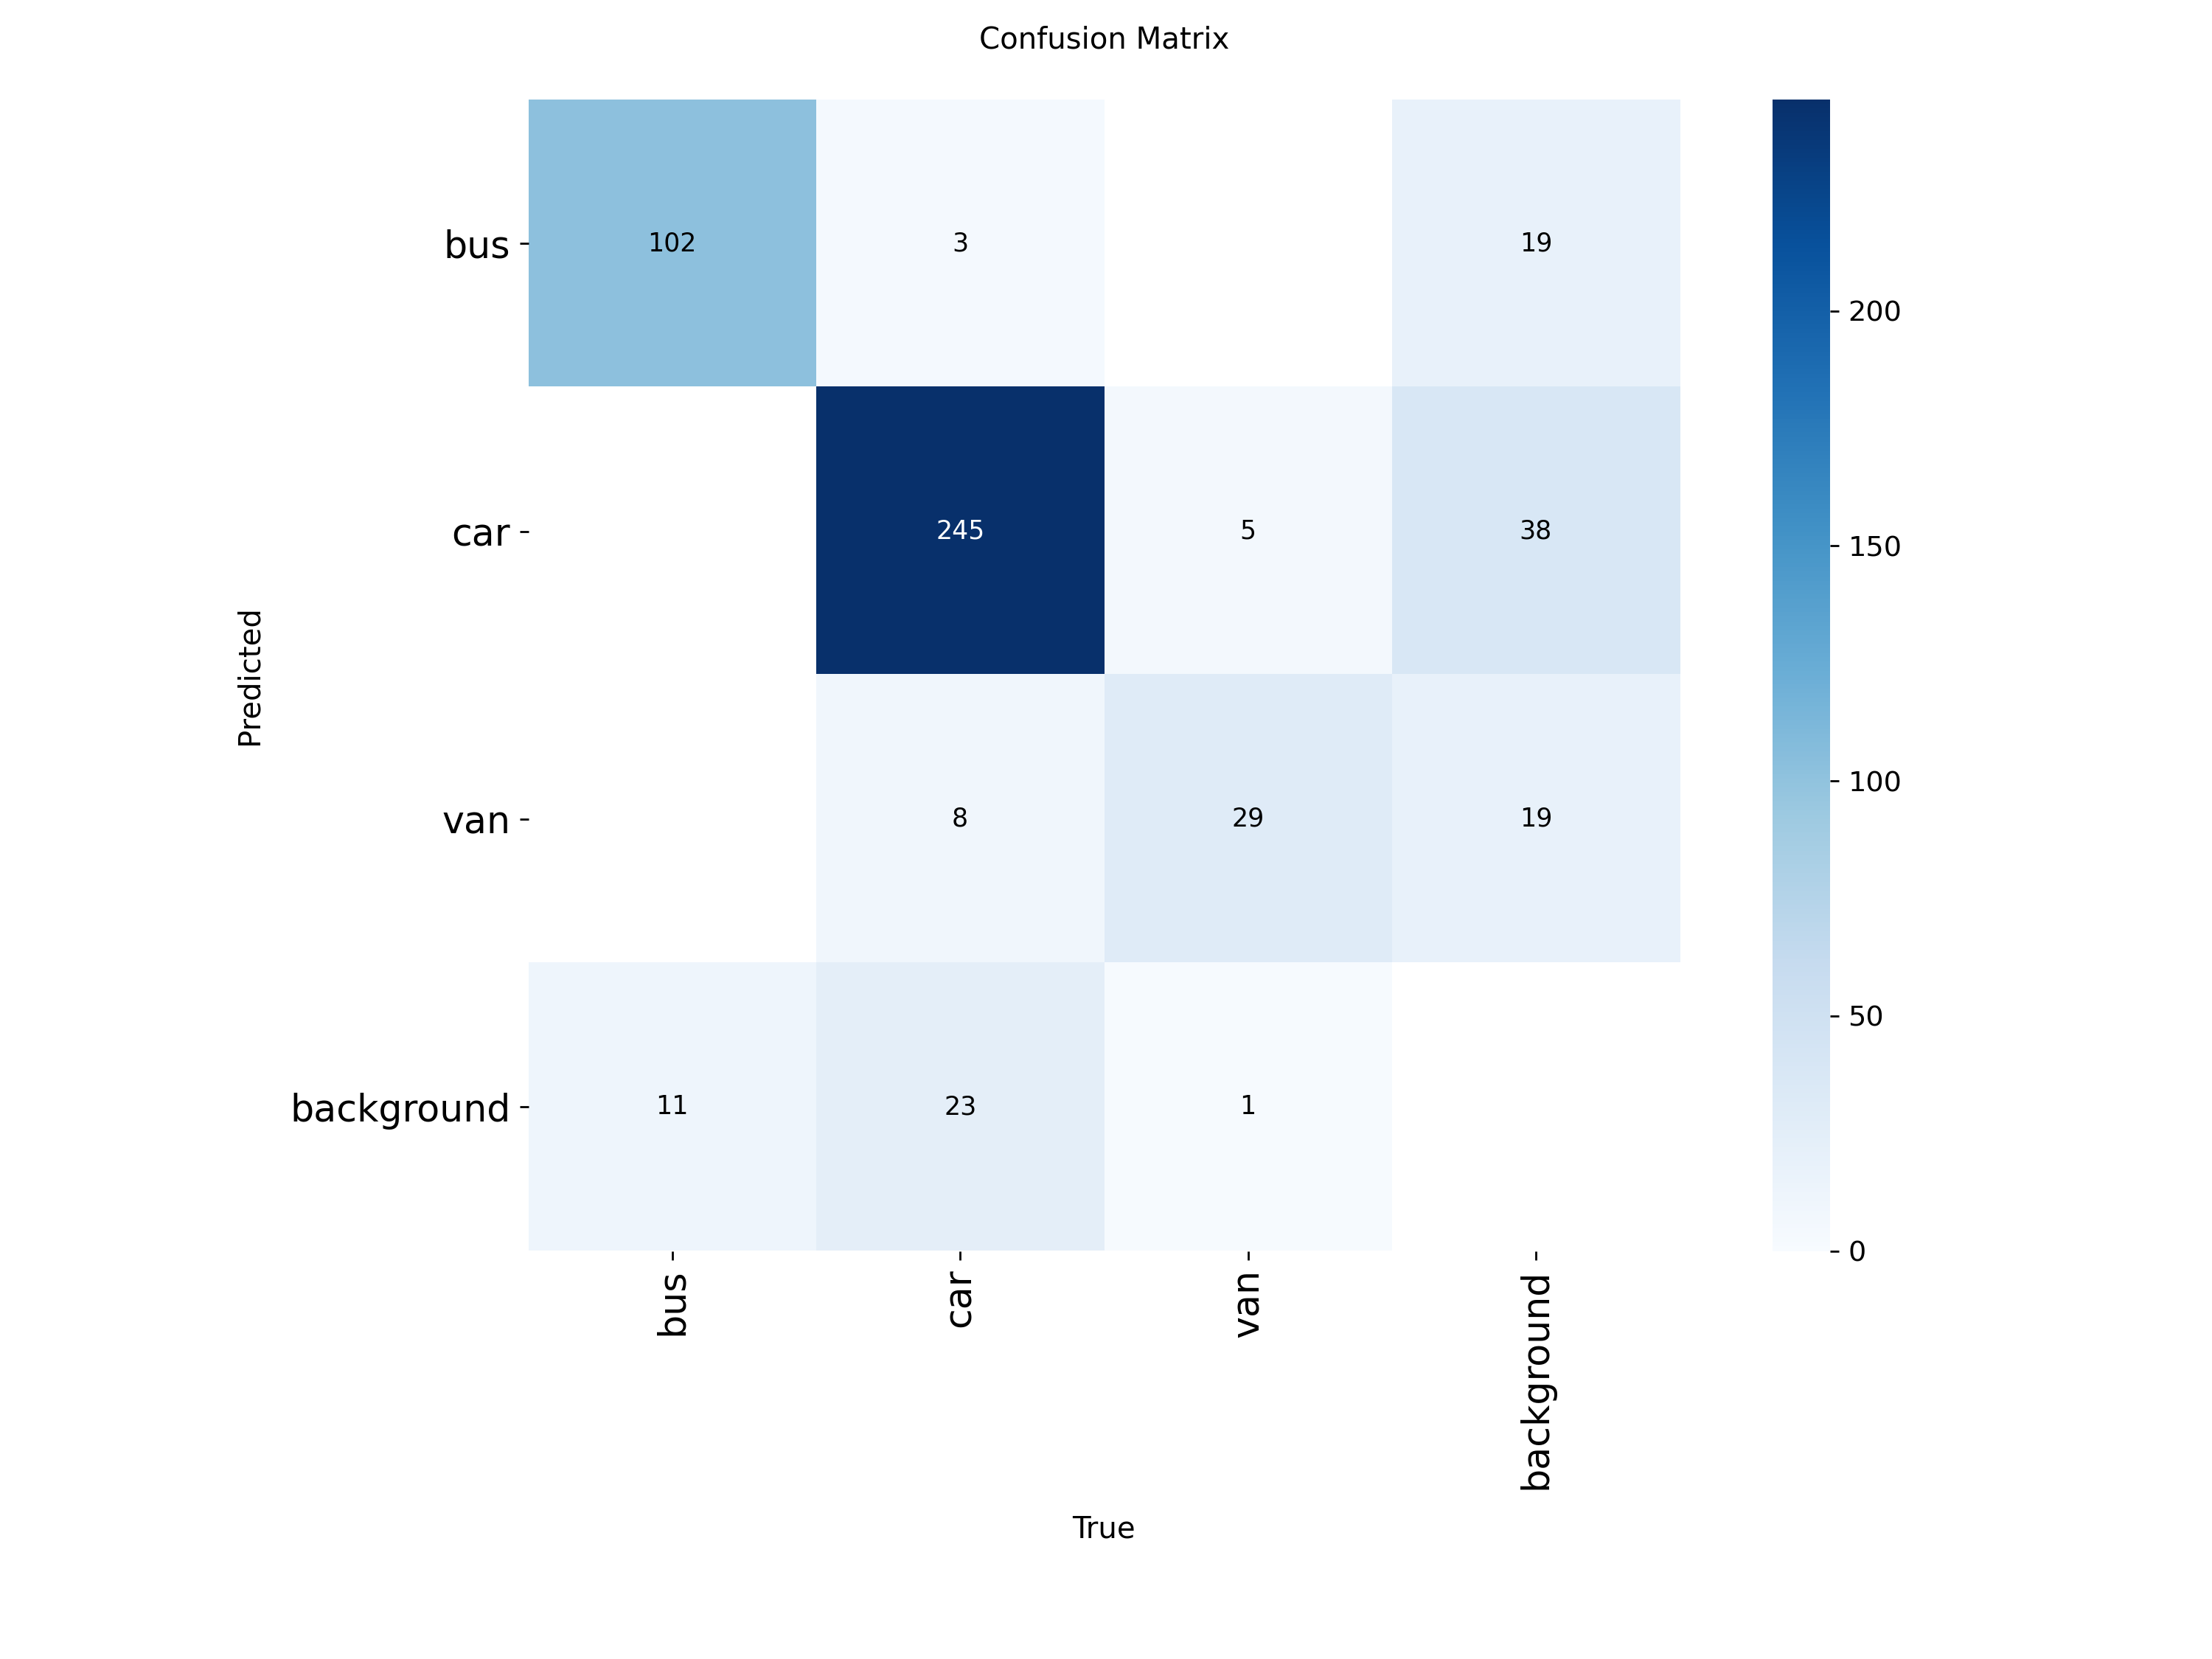

In [14]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

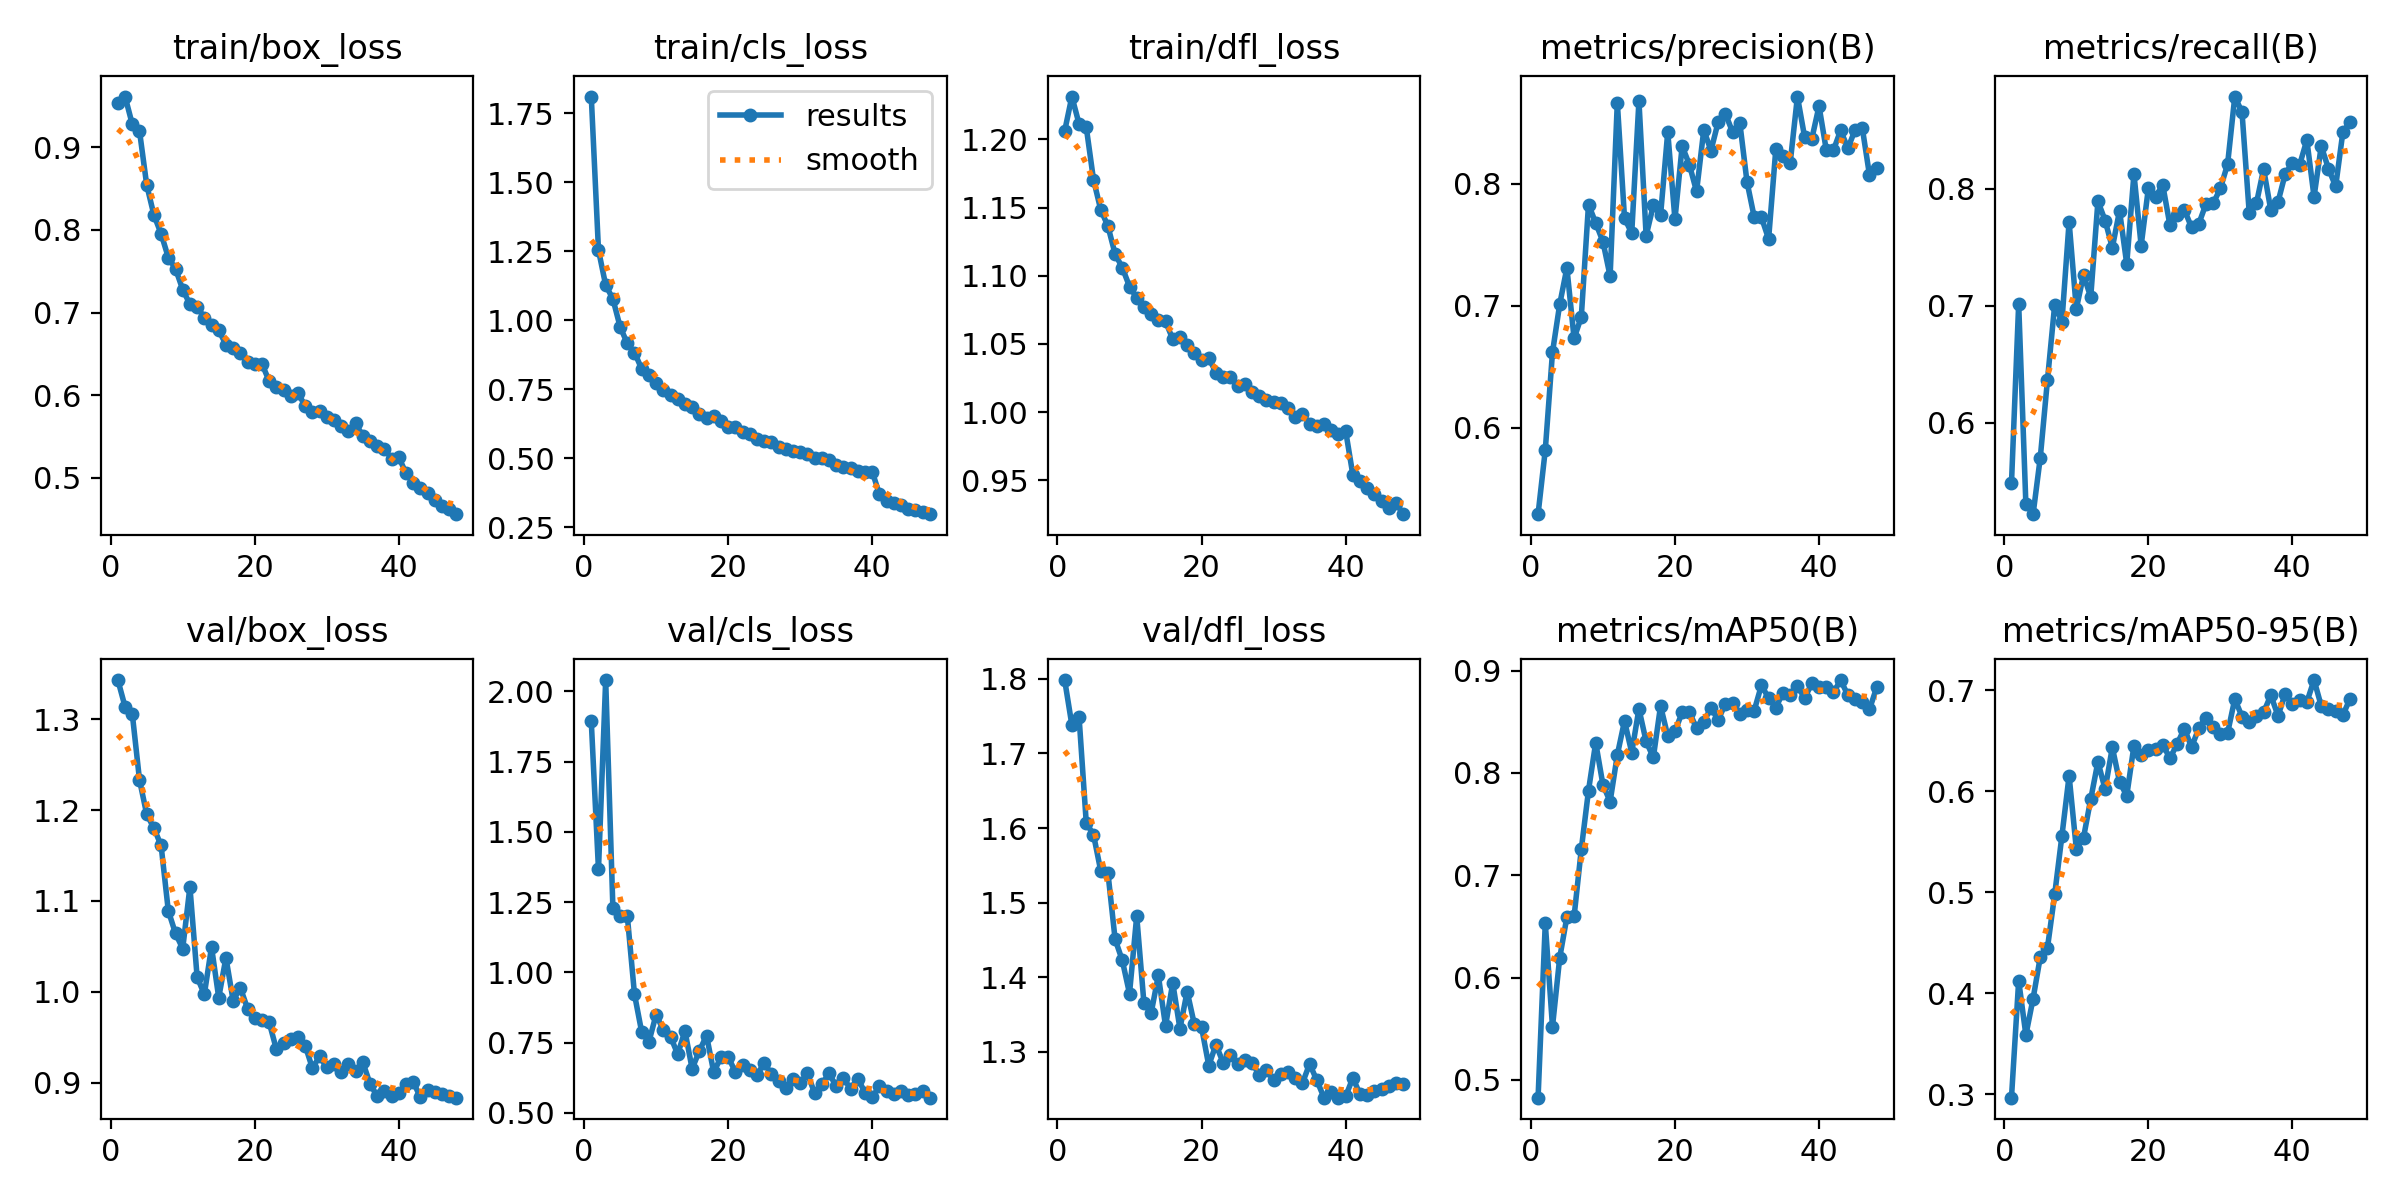

In [15]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [16]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/test/images",
    annotations_directory_path=f"{dataset_location}/test/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

ds.classes

['bus', 'car', 'van']

In [17]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [18]:
!scp /content/runs/detect/train/weights/best.pt "/content/drive/MyDrive/Purwadhika/Capstone Answer/MODULE 4/best.pt" # REPLACE "Your_Folder" with your desired folder in Google Drive